In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

In [55]:
# Load the dataset
data = pd.read_csv('Housing.csv')

# Inspect the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

In [56]:
# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [57]:
# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Add StandardScaler to the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [60]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 1403159.0970399643
R^2: 0.6104801485301419


In [61]:
# Define a function to save the model with versioning
def save_model(model, model_name, version):
    model_dir = f'models/{model_name}_v{version}'
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, f'{model_name}_v{version}.pkl')
    joblib.dump(model, model_path)
    print(f'Model saved to {model_path}')

# Save the model with versioning
save_model(model, 'house_price_predictor', 1)

Model saved to models/house_price_predictor_v1/house_price_predictor_v1.pkl


In [62]:
# saving a new version
save_model(model, 'house_price_predictor', 2)

Model saved to models/house_price_predictor_v2/house_price_predictor_v2.pkl


In [63]:
# Load the model
loaded_model = joblib.load('models/house_price_predictor_v1/house_price_predictor_v1.pkl')

# Use the model to make predictions
new_predictions = loaded_model.predict(X_test)

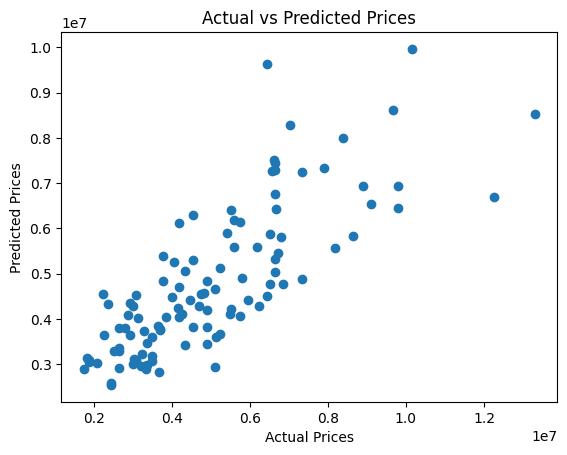

In [64]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

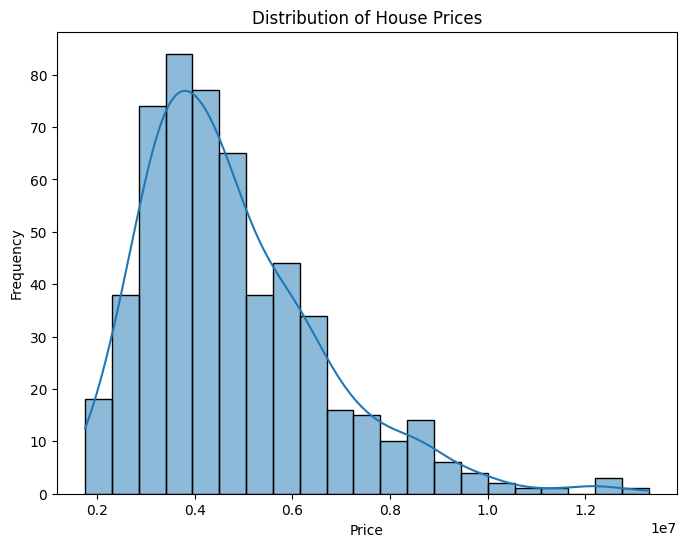

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

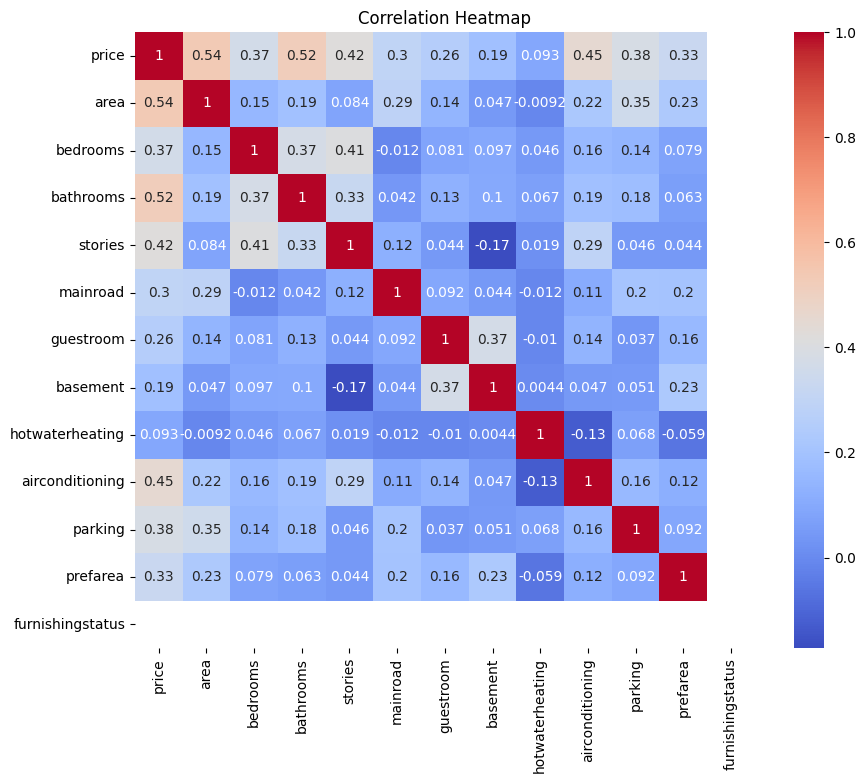

In [66]:
# Convert 'yes' and 'no' to 1 and 0 respectively in relevant columns before calculating correlation
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].map({'yes': 1, 'no': 0}).astype(float)
# Now calculate the correlation and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

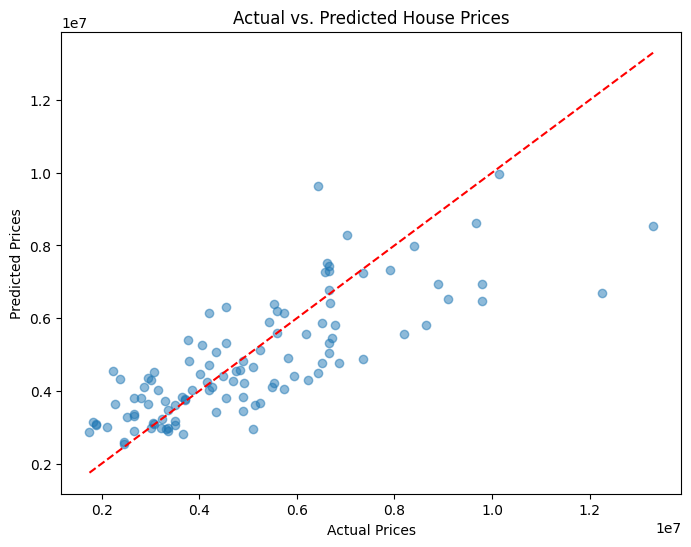

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

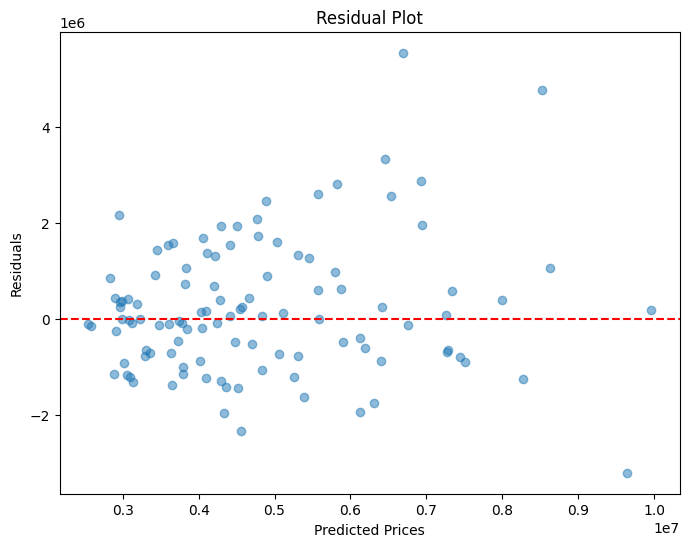

In [68]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

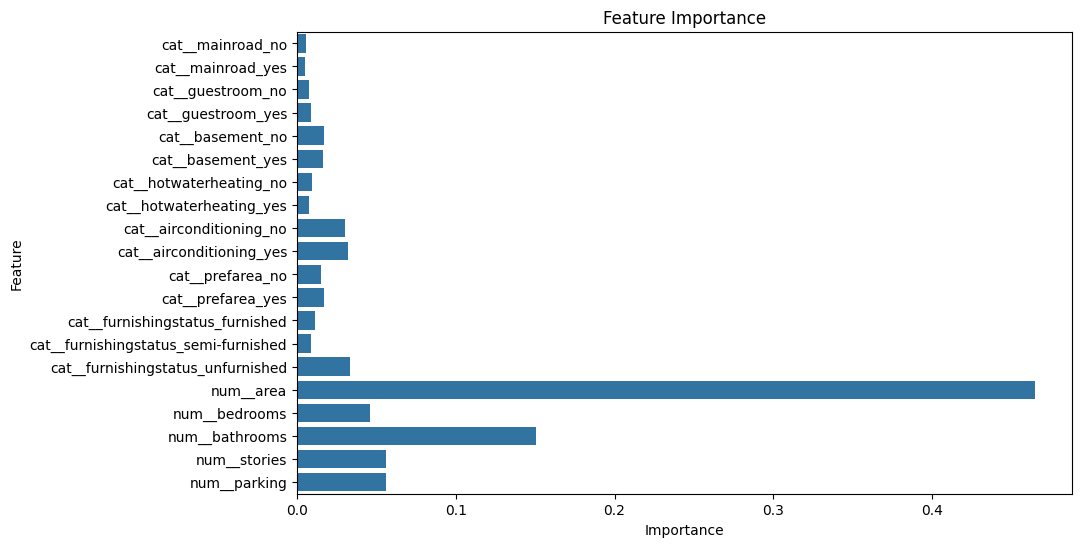

In [69]:
feature_importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')